In [1]:
import pandas as pd 
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
cars_data = pd.read_csv("..\donnees\voitures", delim_whitespace=True)
print(cars_data)

                CYL  PUIS  LON  LAR  POIDS  VITESSE  ACCEL  CO2
ALPHAMITO       875   105  406  172   1130      184   11.4   98
AUDIA1          999    95  397  174   1065      186   10.9  103
CITROENC4      1199   130  442  182   1280      196   10.1  115
JAGUARF        2995   340  447  192   1587      260    5.7  234
PEUGEOTRCZ     1997   160  428  184   1370      220    8.2  130
LANDROVER      2993   256  483  191   2570      180    9.3  203
RENAULTCLIO     898    90  406  173   1092      182   12.2  105
BMWS3          1995   116  462  181   1570      198   11.1  109
DACIA           898    90  406  173    962      175   11.1  116
HYUNDAI        1995   136  447  185   1751      184   10.9  139
LANCIA         2776   177  522  200   2315      193   11.5  207
RENAULTCAPTUR   898    90  412  178   1180      171   13.0  113
FORDMUSTANG    4951   421  272  192   1720      250    4.8  299
FIAT500        1242    69  355  163    905      160   12.9  115
HONDA          2199   150  472  184   16

__<span style="font-size: 18pt;">Visualisation</span>__

In [441]:
print(cars_data.info())
print(cars_data.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, ALPHAMITO to JAGUARPACE
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CYL      20 non-null     int64  
 1   PUIS     20 non-null     int64  
 2   LON      20 non-null     int64  
 3   LAR      20 non-null     int64  
 4   POIDS    20 non-null     int64  
 5   VITESSE  20 non-null     int64  
 6   ACCEL    20 non-null     float64
 7   CO2      20 non-null     int64  
dtypes: float64(1), int64(7)
memory usage: 1.4+ KB
None
              CYL        PUIS         LON         LAR        POIDS  \
count    20.00000   20.000000   20.000000   20.000000    20.000000   
mean   2116.35000  181.600000  432.450000  182.250000  1496.700000   
std    1389.85839  143.280513   53.803223    9.491686   432.622614   
min     875.00000   69.000000  272.000000  163.000000   905.000000   
25%    1149.00000  102.500000  406.000000  174.750000  1167.500000   
50%    1995.00000  133.000000  

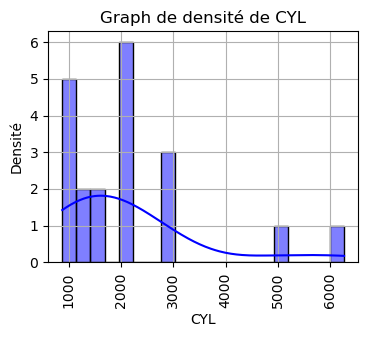

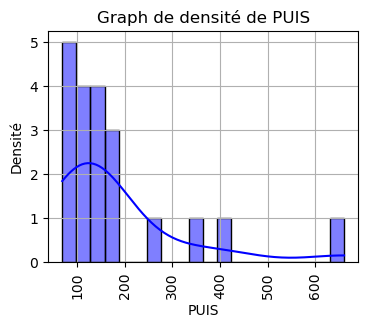

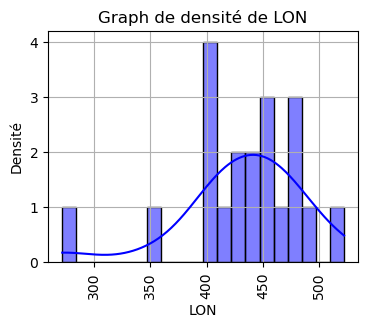

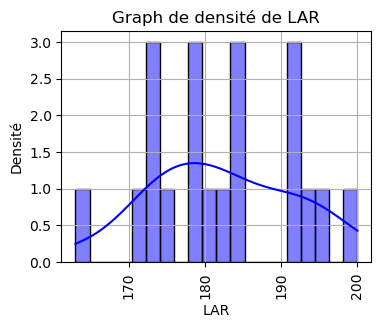

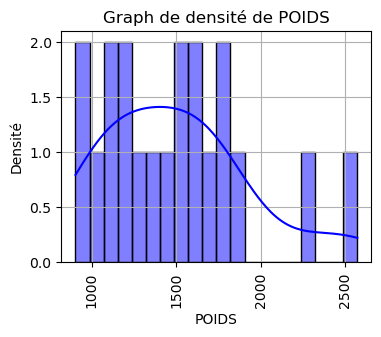

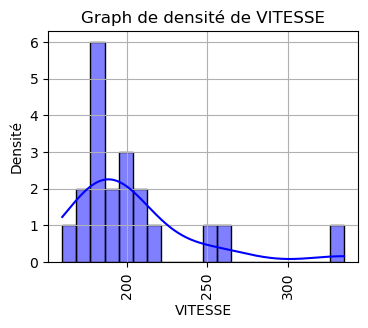

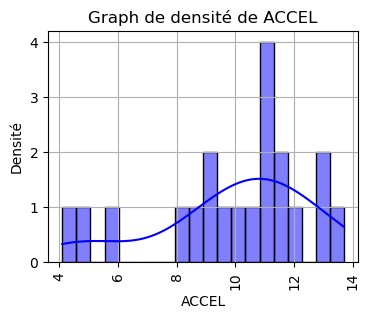

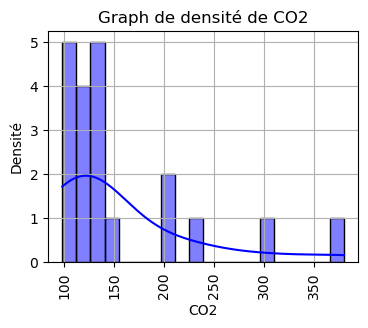

In [442]:
for column in cars_data.columns:
    plt.figure(figsize=(4, 3))
    sns.histplot(cars_data[column],kde=True, color='blue', bins=20)
    plt.title(f'Graph de densité de {column}')
    plt.xlabel(column)
    plt.xticks(rotation=90)
    plt.ylabel('Densité')
    plt.grid(True)
    plt.show()

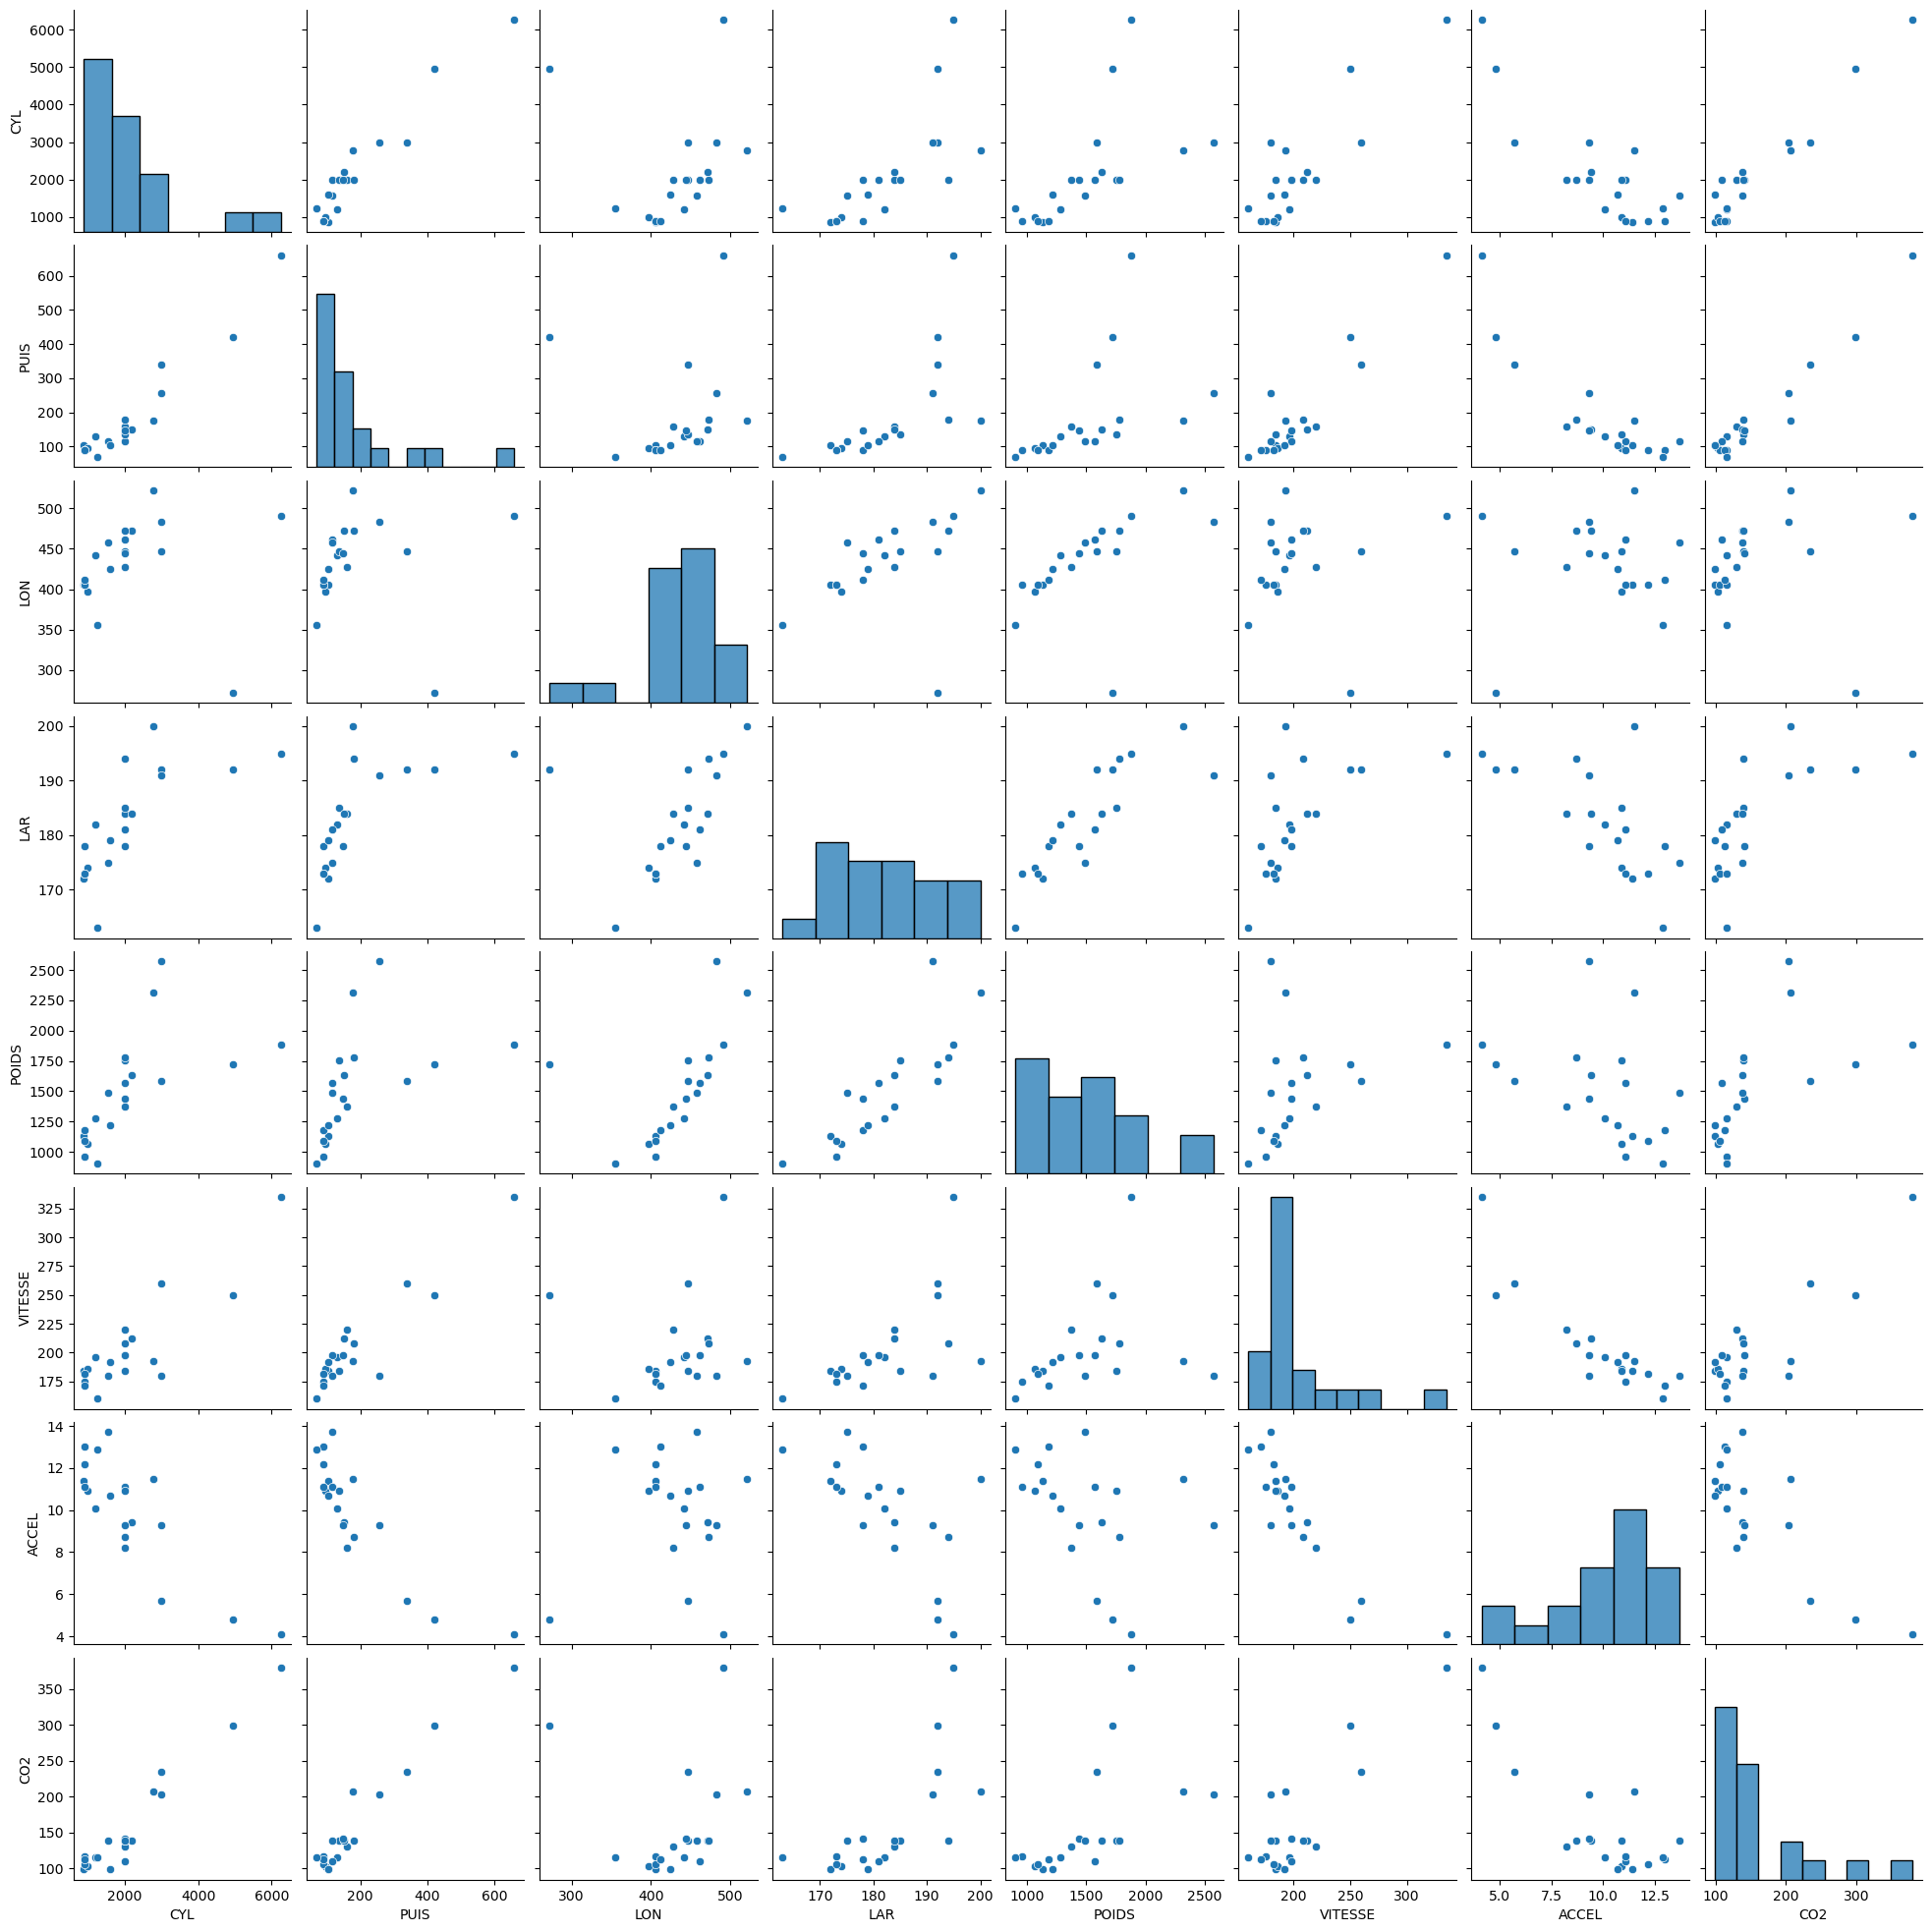

In [443]:
sns.pairplot(cars_data)

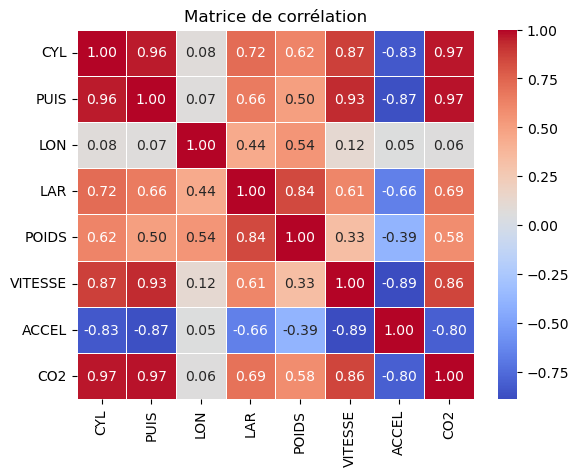

In [444]:
corr_matrix = cars_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matrice de corrélation')
plt.show()

__<span style="font-size: 18pt;">Kmean</span>__

C:\Users\leoco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\leoco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\leoco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\leoco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

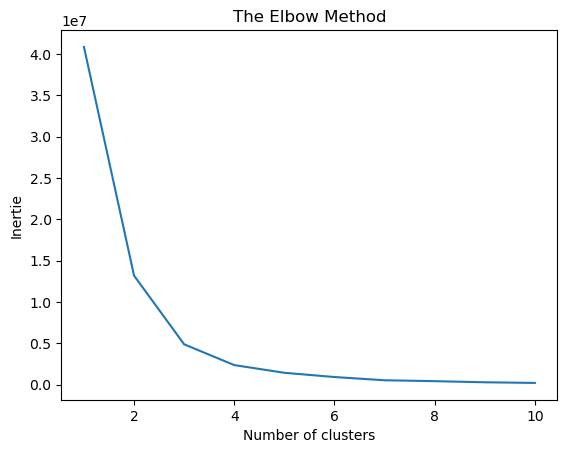

In [445]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(cars_data)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(1, 11), inertia)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertie')
plt.show()

D'apres la methode d'Elbow on choisit un nombre de clusters de 3 

In [446]:
kmeans = KMeans(n_clusters=3, random_state=20) 
kmeans.fit(cars_data)

C:\Users\leoco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\leoco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=20)

In [447]:
kmeans.cluster_centers_

array([[1.12966667e+03, 9.87777778e+01, 4.11888889e+02, 1.74333333e+02,
        1.14711111e+03, 1.80666667e+02, 1.17777778e+01, 1.11333333e+02],
       [5.60650000e+03, 5.40500000e+02, 3.81500000e+02, 1.93500000e+02,
        1.80000000e+03, 2.92500000e+02, 4.45000000e+00, 3.39500000e+02],
       [2.32744444e+03, 1.84666667e+02, 4.64333333e+02, 1.87666667e+02,
        1.77888889e+03, 2.05888889e+02, 9.34444444e+00, 1.60000000e+02]])

In [448]:
pred = kmeans.predict(cars_data)
cars_data['nbcluster=3'] = pred

In [449]:
print(cars_data)

                CYL  PUIS  LON  LAR  POIDS  VITESSE  ACCEL  CO2  nbcluster=3
ALPHAMITO       875   105  406  172   1130      184   11.4   98            0
AUDIA1          999    95  397  174   1065      186   10.9  103            0
CITROENC4      1199   130  442  182   1280      196   10.1  115            0
JAGUARF        2995   340  447  192   1587      260    5.7  234            2
PEUGEOTRCZ     1997   160  428  184   1370      220    8.2  130            2
LANDROVER      2993   256  483  191   2570      180    9.3  203            2
RENAULTCLIO     898    90  406  173   1092      182   12.2  105            0
BMWS3          1995   116  462  181   1570      198   11.1  109            2
DACIA           898    90  406  173    962      175   11.1  116            0
HYUNDAI        1995   136  447  185   1751      184   10.9  139            2
LANCIA         2776   177  522  200   2315      193   11.5  207            2
RENAULTCAPTUR   898    90  412  178   1180      171   13.0  113            0

In [450]:
for cluster in range(0,3):
    print(cars_data[cars_data["nbcluster=3"]==cluster], "\n")

                CYL  PUIS  LON  LAR  POIDS  VITESSE  ACCEL  CO2  nbcluster=3
ALPHAMITO       875   105  406  172   1130      184   11.4   98            0
AUDIA1          999    95  397  174   1065      186   10.9  103            0
CITROENC4      1199   130  442  182   1280      196   10.1  115            0
RENAULTCLIO     898    90  406  173   1092      182   12.2  105            0
DACIA           898    90  406  173    962      175   11.1  116            0
RENAULTCAPTUR   898    90  412  178   1180      171   13.0  113            0
FIAT500        1242    69  355  163    905      160   12.9  115            0
MAZDA          1560   115  458  175   1490      180   13.7  138            0
VOLKSWAGEN     1598   105  425  179   1220      192   10.7   99            0 

              CYL  PUIS  LON  LAR  POIDS  VITESSE  ACCEL  CO2  nbcluster=3
FORDMUSTANG  4951   421  272  192   1720      250    4.8  299            1
FERRARI      6262   660  491  195   1880      335    4.1  380            1 

 

In [452]:
for i in range(0,3):
    print("cluster = ", i)
    print(cars_data[cars_data['nbcluster=3']==i].describe())

cluster =  0
            CYL      PUIS       LON       LAR     POIDS   VITESSE     ACCEL  \
count  9.000000  9.000000  9.000000  9.000000  9.000000  9.000000  9.000000   
mean  -0.728359 -0.593059 -0.392082 -0.855731 -0.829061 -0.584118  0.713491   
std    0.212812  0.125248  0.554599  0.582095  0.414665  0.283670  0.477604   
min   -0.916351 -0.806287 -1.476901 -2.080777 -1.403235 -1.119848  0.058554   
25%   -0.899373 -0.655913 -0.504377 -0.999854 -1.023790 -0.731012  0.370842   
50%   -0.824816 -0.620110 -0.504377 -0.891762 -0.869641 -0.549555  0.566022   
75%   -0.645436 -0.548504 -0.142065 -0.459392 -0.656203 -0.445865  1.151562   
max   -0.382640 -0.369488  0.487215 -0.027023 -0.015889 -0.186641  1.463850   

            CO2  nbcluster=3  
count  9.000000          9.0  
mean  -0.618065          0.0  
std    0.169423          0.0  
min   -0.802355          0.0  
25%   -0.733246          0.0  
50%   -0.595028          0.0  
75%   -0.567385          0.0  
max   -0.249483          0.

Cluster:  0


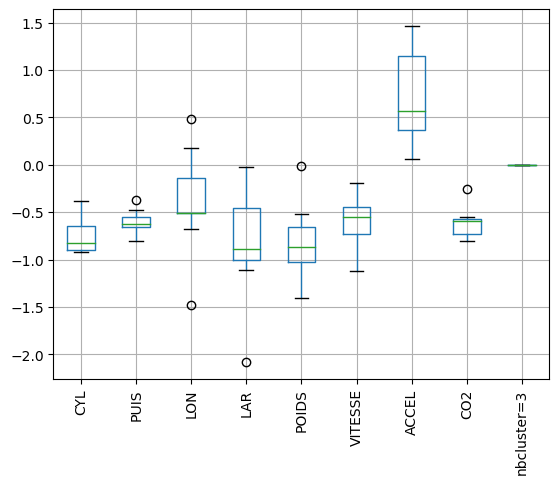

Cluster:  1


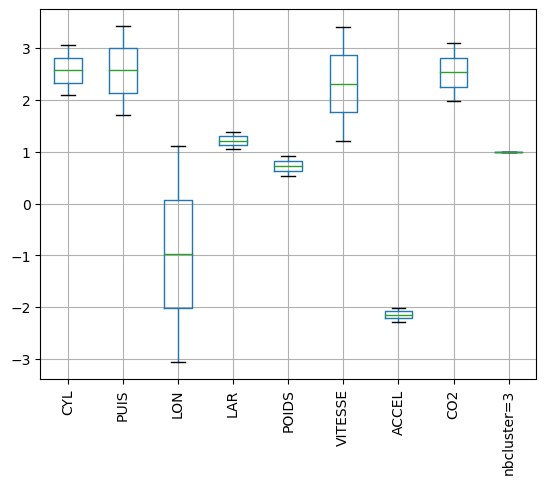

Cluster:  2


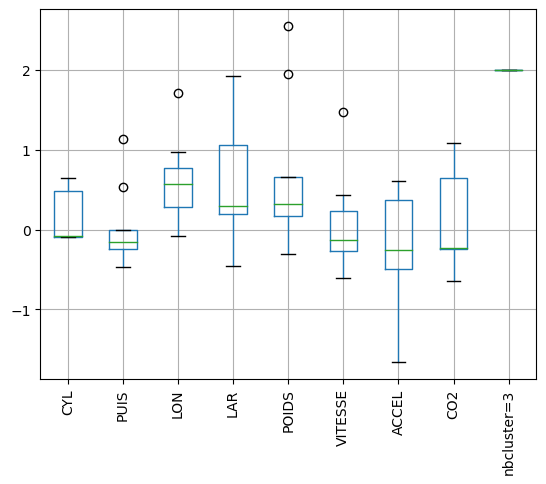

In [451]:
#centré normé les données pour boxplots plus lisibles 
cars_data_cn = StandardScaler().fit_transform(cars_data)

columns_to_normalize = ['CYL', 'PUIS','LON','LAR','POIDS','VITESSE','ACCEL','CO2']

cars_data[columns_to_normalize] = StandardScaler().fit_transform(cars_data[columns_to_normalize])

for i in [0,1,2]:
    print('Cluster: ',i)
    cars_data[cars_data['nbcluster=3']==i].boxplot()
    plt.xticks(rotation=90)
    plt.show()

__Avec 4 clusters:__

In [458]:
cars_data = pd.read_csv(r"C:\Users\leoco\Documents\cours\M1\Machine learning\PROJET\donnees(1)\voitures", delim_whitespace=True)

kmeans = KMeans(n_clusters=4, random_state=20) 
kmeans.fit(cars_data)

pred2 = kmeans.predict(cars_data)
cars_data['nbcluster=4'] = pred2

for cluster in range(0,4):
    print(cars_data[cars_data["nbcluster=4"]==cluster], "\n")

C:\Users\leoco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\leoco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


                CYL  PUIS  LON  LAR  POIDS  VITESSE  ACCEL  CO2  nbcluster=4
ALPHAMITO       875   105  406  172   1130      184   11.4   98            0
AUDIA1          999    95  397  174   1065      186   10.9  103            0
CITROENC4      1199   130  442  182   1280      196   10.1  115            0
RENAULTCLIO     898    90  406  173   1092      182   12.2  105            0
DACIA           898    90  406  173    962      175   11.1  116            0
RENAULTCAPTUR   898    90  412  178   1180      171   13.0  113            0
FIAT500        1242    69  355  163    905      160   12.9  115            0 

              CYL  PUIS  LON  LAR  POIDS  VITESSE  ACCEL  CO2  nbcluster=4
FORDMUSTANG  4951   421  272  192   1720      250    4.8  299            1
FERRARI      6262   660  491  195   1880      335    4.1  380            1 

            CYL  PUIS  LON  LAR  POIDS  VITESSE  ACCEL  CO2  nbcluster=4
JAGUARF    2995   340  447  192   1587      260    5.7  234            2
LANDROVER

__<span style="font-size: 18pt;">Interprétation</span>__

__Avec un nombre de clusters de 3 on a:     
    - cluster 0: un groupe de voitures peu performantes et plutôt légères (citadines,...).  
    - cluster 1: un groupe de voitures puissantes, rapides et qui sont de grosses cylindrées (voitures de sport qui sont perforamntes).  
    - cluster 2: un groupe de voitures dont les caractéristiques sont assez hétérogènes (grands écarts-types) et pas caractérisées par une variable en particulier  (on y retrouve en particulier les SUV haut de gamme décris dans l'ACP). Ce sont des voitures plus performantes que celles du cluster 0.__

__Avec un nombre de clusters de 4 on a:     
    - cluster 0: un groupe de voitures peu performantes et plutôt légères.  
    - cluster 1: un groupe de voitures puissantes, rapides et qui sont de grosses cylindrées (voitures de sport qui sont très perforamntes).   
    - cluster 2: un groupe de grosses voitures avec beaucoup de cylindres et performantes (type SUV).     
    - cluster 3: un groupe de voitures dont les caractéristiques sont "moyennes" et pas caractérisées par une variable en particulier.    
      Ce sont des voitures plus performantes que celles du cluster 0.__  
 
    
    
    

__On retrouve des résultats cohérents avec l'ACP__

__<span style="font-size: 18pt;">Clustering Hierarchique</span>__

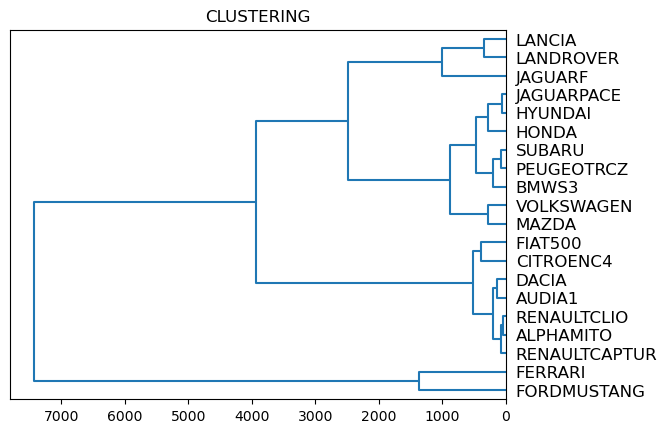

In [455]:
cars_data = pd.read_csv(r"C:\Users\leoco\Documents\cours\M1\Machine learning\PROJET\donnees(1)\voitures", delim_whitespace=True)

#matrice des liens 
Z = linkage(cars_data,method='ward', metric='euclidean')

#affichage du dendrogramme
plt.title("CLUSTERING")
dendrogram(Z, labels=cars_data.index, orientation='left', color_threshold=0)
plt.show()

On a envie de couper ce graphique en 3 ou 4 groupes 

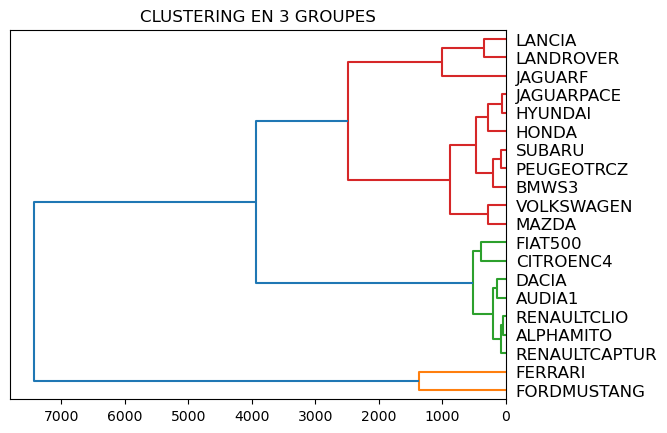

[2 2 2 4 3 4 2 3 2 3 4 2 1 2 3 1 3 3 3 3]


In [456]:
plt.title('CLUSTERING EN 3 GROUPES')
dendrogram(Z, labels=cars_data.index, orientation='left', color_threshold=3000)
plt.show()
groupes_cah = fcluster(Z, t=2000,criterion='distance')
print(groupes_cah)

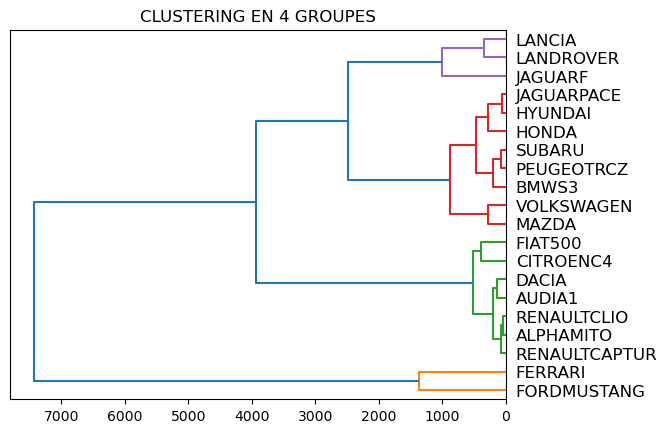

[2 2 2 4 3 4 2 3 2 3 4 2 1 2 3 1 3 3 3 3]


In [457]:
plt.title('CLUSTERING EN 4 GROUPES')
dendrogram(Z, labels=cars_data.index, orientation='left', color_threshold=2000)
plt.show()
groupes_cah = fcluster(Z, t=2000,criterion='distance')
print(groupes_cah)

__En orange les voitures de sport performantes  
En vert les voitures plutôt légères et peu performantes  
En violet les plutôt grosses voitures assez performantes type SUV   
En rouge un groupe de voitures aux caractérisrtiques moyennes__  